# Average distances between fake and real papers and references

## 1. Read data:

In [1]:
import pandas as pd
import os
import math
import os.path
import numpy as np
from sklearn.preprocessing import Normalizer
from scipy.spatial import distance

# This path contains embeddings of each paper and each reference.
embedding_path = '/Users/zeyuhu/Documents/job/mdpi/code/scraper/data/tmp/embeddings_for_zeyu'

# These csv files contain lists of fake/real papers/references with their ID and label.
fake_ppr_list = '/Users/zeyuhu/Documents/job/mdpi/code/scraper/fake_paper_ID.csv'
real_ppr_list = '/Users/zeyuhu/Documents/job/mdpi/code/scraper/real_paper_ID.csv'
fake_rfr_list = '/Users/zeyuhu/Documents/job/mdpi/code/scraper/fake_reference_ID.csv'
real_rfr_list = '/Users/zeyuhu/Documents/job/mdpi/code/scraper/real_reference_ID.csv'

# Read data of these 4 csv file and obtain corresponding dataframes. 
df_fake_ppr = pd.read_csv(fake_ppr_list)
df_real_ppr = pd.read_csv(real_ppr_list)
df_fake_ref = pd.read_csv(fake_rfr_list)
df_real_ref = pd.read_csv(real_rfr_list)

# see how many fake/real papers/references we have.
print("number of fake_paper = ", len(df_fake_ppr.index))
print("number of real_paper = ", len(df_real_ppr.index))
print("number of fake_reference = ", len(df_fake_ref.index))
print("number of real_reference = ", len(df_real_ref.index))


# see total valid embeddings we have got.
files = os.listdir(embedding_path)
print("number of total identical valid embeddings =", len(files))

number of fake_paper =  236
number of real_paper =  193
number of fake_reference =  4476
number of real_reference =  5324
number of total valid embeddings = 7830


## 2. Extract data:

In [2]:
# Because not all papers and references are available, we have to figure out which paper or reference is missing. Our distance calculation is based on list.

fake_ppr_eb_list = []
real_ppr_eb_list = []
fake_ref_eb_list = []
real_ref_eb_list = []

fake_ref_sub_list = []
real_ref_sub_list = []

valid_fake_ppr_label_list = []
valid_real_ppr_label_list = []

valid_fake_ref_label_list = []
valid_real_ref_label_list = []

missing_fake_set = set()
missing_real_set = set()

# Make data type compatible
df_fake_ppr.ID = df_fake_ppr.ID.astype(str)
df_real_ppr.ID = df_real_ppr.ID.astype(str)
df_fake_ref.ID = df_fake_ref.ID.astype(str)
df_real_ref.ID = df_real_ref.ID.astype(str)

### 2-1. Extract fake papers:

In [3]:
# iterate throughout each row of dataframe. 1. get the id of each row.  2. check if the id is available in the folder containing embeddings. 
# 3. if yes, then get the embedding and normalize it, and the same time add this file number to valid list. Otherwise, nothing will be done.

df_fake_ppr = df_fake_ppr.reset_index()
for index, row in df_fake_ppr.iterrows():
    id = row['ID']
    if id in files:
        num = row['Num']
        path = embedding_path + "/" + id
        eb = pd.read_csv(path, header=None).to_numpy()
        transformer = Normalizer().fit(eb)
        eb2 = transformer.transform(eb)
        fake_ppr_eb_list.append(eb2)
        valid_fake_ppr_label_list.append(num)
len_fp = len(fake_ppr_eb_list)
print(len_fp)

# finding out which papers do not have valid embeddings. 
for k in range(1, 237):
    if not (k in valid_fake_ppr_label_list):
        missing_fake_set.add(k)

# print out invalid file number

if missing_fake_set == ():
    print("All embeddings of real papers can be found.")
else:
    print("Index of fake paper which do not have valid embeddings are :", missing_fake_set)

231
Index of fake paper which do not have valid embeddings are : {161, 117, 21, 122, 159}


### 2-2. Extract real papers:

In [4]:
# iterate throughout each row of dataframe. 1. get the id of each row.  2. check if the id is available in the folder containing embeddings. 
# 3. if yes, then get the embedding and normalize it, and the same time add this file number to valid list. Otherwise, nothing will be done.
df_real_ppr = df_real_ppr.reset_index()
for index, row in df_real_ppr.iterrows():
    id = row['ID']
    if id in files:
        label = row['Label']
        num = row['Num']
        path = embedding_path + "/" + id
        eb = pd.read_csv(path, header=None).to_numpy()
        transformer = Normalizer().fit(eb)
        eb2 = transformer.transform(eb)
        real_ppr_eb_list.append(eb2)
        valid_real_ppr_label_list.append(num)
len_rp = len(real_ppr_eb_list)
print(len_rp)

# finding out which papers do not have valid embeddings:
for k in range(237, 430):
    if not (k in valid_real_ppr_label_list):
        missing_real_set.add(k)
# print out invalid file number
if missing_real_set == ():
    print("All embeddings of real papers can be found.")
else:
    print("Index of real paper which do not have valid embeddings are :", missing_real_set)

193
Index of real paper which do not have valid embeddings are : set()


### 2-3. Extract fake references:

In [5]:
# iterate throughout each row of dataframe. 1. get the id of each row.  2. check if the id is available in the folder containing embeddings. 
# 3. if yes, then get the embedding and normalize it, and the same time add this file number to valid list. Otherwise, nothing will be done.
df_fake_ref = df_fake_ref.reset_index()
flag = 1
sub_list = []
for index, row in df_fake_ref.iterrows():
    id = row['ID']
    
    if id in files:
        label = row['Label']
        num = row['Num']
        path = embedding_path + "/" + id
        eb = pd.read_csv(path, header=None).to_numpy()
        transformer = Normalizer().fit(eb)
        eb2 = transformer.transform(eb)

        fake_ref_eb_list.append(eb2)

        if num == flag:
            sub_list.append(eb2)
        else:
            fake_ref_sub_list.append(sub_list)
            valid_fake_ref_label_list.append(flag)
            flag = num
            sub_list = []
            sub_list.append(eb2)

fake_ref_sub_list.append(sub_list)
valid_fake_ref_label_list.append(flag)
    

len_fr = len(fake_ref_eb_list)
print(len_fr)
len_sub_fr = len(fake_ref_sub_list)
print(len_sub_fr)
print(len(valid_fake_ref_label_list))
# finding out which papers do not have valid embeddings:
for k in range(1, 237):
    if not (k in valid_fake_ref_label_list):
        missing_fake_set.add(k)

# print out invalid file number which do not have valid embeddings

print("Index of fake papers and fake references which do not have valid embeddings are :", missing_fake_set)


3440
233
233
Index of fake papers and fake references which do not have valid embeddings are : {161, 169, 117, 21, 183, 122, 159}


### 2-4. Extract real references:

In [6]:
# iterate throughout each row of dataframe. 1. get the id of each row.  2. check if the id is available in the folder containing embeddings. 
# 3. if yes, then get the embedding and normalize it, and the same time add this file number to valid list. Otherwise, nothing will be done.
df_real_ref = df_real_ref.reset_index()
flag = 237
sub_list = []
for index, row in df_real_ref.iterrows():
    id = row['ID']
    if id in files:
        label = row['Label']
        num = row['Num']
        path = embedding_path + "/" + id
        eb = pd.read_csv(path, header=None).to_numpy()
        transformer = Normalizer().fit(eb)
        eb2 = transformer.transform(eb)

        real_ref_eb_list.append(eb2)

        if num == flag:
            sub_list.append(eb2)
        else:
            real_ref_sub_list.append(sub_list)
            valid_real_ref_label_list.append(flag)
            flag = num
            sub_list = []
            sub_list.append(eb2)

real_ref_sub_list.append(sub_list)
valid_real_ref_label_list.append(flag)

len_rr = len(real_ref_eb_list)
print(len_rr)
len_sub_rr = len(real_ref_sub_list)
print(len_sub_rr)

# finding out which papers do not have valid embeddings:
for k in range(237, 430):
    if not (k in valid_real_ref_label_list):
        missing_real_set.add(k)

# print out invalid file number which do not have valid embeddings
print("Index of real papers and real references which do not have valid embeddings are :", missing_real_set)

4389
193
Index of real papers and real references which do not have valid embeddings are : set()


## 3. Distance Calculation:

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns


# 1. distance: fake paper vs same fake paper's reference
same_fpfr_dis_list = []

# 2. distance: real paper vs same real paper's reference
same_rprr_dis_list = []

# 3. distance: same fake paper's reference vs same fake paper's reference
same_frfr_dis_list = []

# 4. distance: same real paper's reference vs same real paper's reference
same_rrrr_dis_list = []


### 3-1. Average Distance: fake paper vs same fake paper's reference

In [8]:

for i in range(1, 237):

    #  Select only valid fake papers. i is the index for papers, and j is the index for that paper's reference. 
    if i not in missing_fake_set:

        # initiate empty list to store the distance for each paper
        dis_same_sub_fpfr_list = []

        # select only valid fake paper so we need to get the index
        fp_index = valid_fake_ppr_label_list.index(i)

        # obtain the corresponding embeddings from the list we got before.
        eb_fp = fake_ppr_eb_list[fp_index]

        # select only valid fake references' list through the index
        fr_index = valid_fake_ref_label_list.index(i)

        # obtain same paper's ref embeddings list
        list_eb_fr = fake_ref_sub_list[fp_index]

        # because we have a sub list of references for each paper, we need to calculate distance of that paper with each reference
        for j in range(len(list_eb_fr)):
            # we used cosine distance and calculate each distance

            dis_same_fpfr = distance.cosine(eb_fp, list_eb_fr[j])
            dis_same_sub_fpfr_list.append(dis_same_fpfr)

        # calculate average distance for each paper and store them.
        ave = sum(dis_same_sub_fpfr_list)/len(dis_same_sub_fpfr_list)
        same_fpfr_dis_list.append(ave)
        
# see the average distance of all fake papers and their references   
num_same_fpfr_dis = len(same_fpfr_dis_list)
print("num of same fake paper vs same fake reference: ", num_same_fpfr_dis)
ave_dis_same_fp_fr = sum(same_fpfr_dis_list)/num_same_fpfr_dis
print("Average distance of same fake paper vs same fake reference: ", ave_dis_same_fp_fr)

num of same fake paper vs same fake reference:  229
Average distance of same fake paper vs same fake reference:  0.3868903496250825


### 3-2. Average Distance: real paper vs same real paper's reference

In [9]:
for i in range(237, 430):

    #  Because all real papers and references are valid so we do not need to select this time.
    # i is the index for papers, and j is the index for that paper's reference.
    #  initiate empty list to store the distance for each paper 
    dis_same_sub_rprr_list = []

    rp_index = valid_real_ppr_label_list.index(i)
    
    eb_rp = real_ppr_eb_list[rp_index]

    # obtain the corresponding embeddings from the list we got before.
    rr_index = valid_real_ref_label_list.index(i)

    # find same paper's references' embedings list
    list_eb_rr = real_ref_sub_list[rp_index]

    for j in range(len(list_eb_rr)):

        # calculate cosine distance and store them.
        dis_same_rprr = distance.cosine(eb_rp, list_eb_rr[j])
        dis_same_sub_rprr_list.append(dis_same_rprr)

    # calculate average distance for each paper.
    ave = sum(dis_same_sub_rprr_list)/len(dis_same_sub_rprr_list)
    same_rprr_dis_list.append(ave)
        
# see average distance of all real papers  and their references.    
num_same_rprr_dis = len(same_rprr_dis_list)
print("num of same real paper vs same real reference: ", num_same_rprr_dis)
ave_dis_same_rp_rr = sum(same_rprr_dis_list)/num_same_rprr_dis
print("Average distance of same real paper vs same real reference: ", ave_dis_same_rp_rr)

num of same real paper vs same real reference:  193
Average distance of same real paper vs same real reference:  0.21613780631951202


### 3-3. Average Distance: same fake paper's reference vs same fake paper's reference

In [10]:
# similar as above but i is the index of fake reference, and j is the index of another fake reference of the same fake paper
for i in range(len_sub_fr):
    sub_list = fake_ref_sub_list[i]
    len_sub = len(sub_list)

    # we have to make sure that this paper has at least 2 references, otherwise there is nothing to compare.
    if len_sub >= 2:

        dis_same_sub_frfr_list = []

        for j in range(len_sub):
            for k in range(j+1, len_sub):
                dis = distance.cosine(sub_list[j], sub_list[k])
                dis_same_sub_frfr_list.append(dis)

        ave = sum(dis_same_sub_frfr_list)/len(dis_same_sub_frfr_list)
        same_frfr_dis_list.append(ave)


num_same_frfr_dis = len(same_frfr_dis_list)
print("num of same fake paper vs same fake reference(each contains at least 2 references): ", num_same_frfr_dis)
ave_dis_same_fr_fr = sum(same_frfr_dis_list)/num_same_frfr_dis
print("Average distance of same fake paper vs same fake reference: ", ave_dis_same_fr_fr)

num of same fake paper vs same fake reference(each contains at least 2 references):  219
Average distance of same fake paper vs same fake reference:  0.2536989723561382


### 3-4. Average Distance: same real paper's reference vs same real paper's reference

In [11]:
# similar as above but i is the index of real reference, and j is the index of another real reference of the same real paper
for i in range(len_sub_rr):
    sub_list = real_ref_sub_list[i]
    len_sub = len(sub_list)

    # we have to make sure that this paper has at least 2 references, otherwise there is nothing to compare.
    if len_sub >= 2:

        dis_same_sub_rrrr_list = []

        for j in range(len_sub):
            for k in range(j+1, len_sub):
                dis = distance.cosine(sub_list[j], sub_list[k])
                dis_same_sub_rrrr_list.append(dis)

        ave = sum(dis_same_sub_rrrr_list)/len(dis_same_sub_rrrr_list)
        same_rrrr_dis_list.append(ave)


num_same_rrrr_dis = len(same_rrrr_dis_list)
print("num of same real paper vs same real reference(each contains at least 2 references): ", num_same_rrrr_dis)
ave_dis_same_rr_rr = sum(same_rrrr_dis_list)/num_same_rrrr_dis
print("Average distance of same real paper vs same real reference: ", ave_dis_same_rr_rr)

num of same real paper vs same real reference(each contains at least 2 references):  193
Average distance of same real paper vs same real reference:  0.2592165231680394


## 4. Plot graph

In [12]:
col1 = 'fake papers and their references'
col2 = 'real papers and their references'
col3 = 'Ave. dist. of fake reference'
col4 = 'Ave. dist. of real reference'


# using the above distances that we have calculated to plot

df1 = pd.DataFrame(same_fpfr_dis_list, columns =[col1])
df2 = pd.DataFrame(same_rprr_dis_list, columns =[col2])
df3 = pd.DataFrame(same_frfr_dis_list, columns =[col3])
df4 = pd.DataFrame(same_rrrr_dis_list, columns =[col4])


### 4-1. Boxplot:

<Figure size 3000x3000 with 0 Axes>

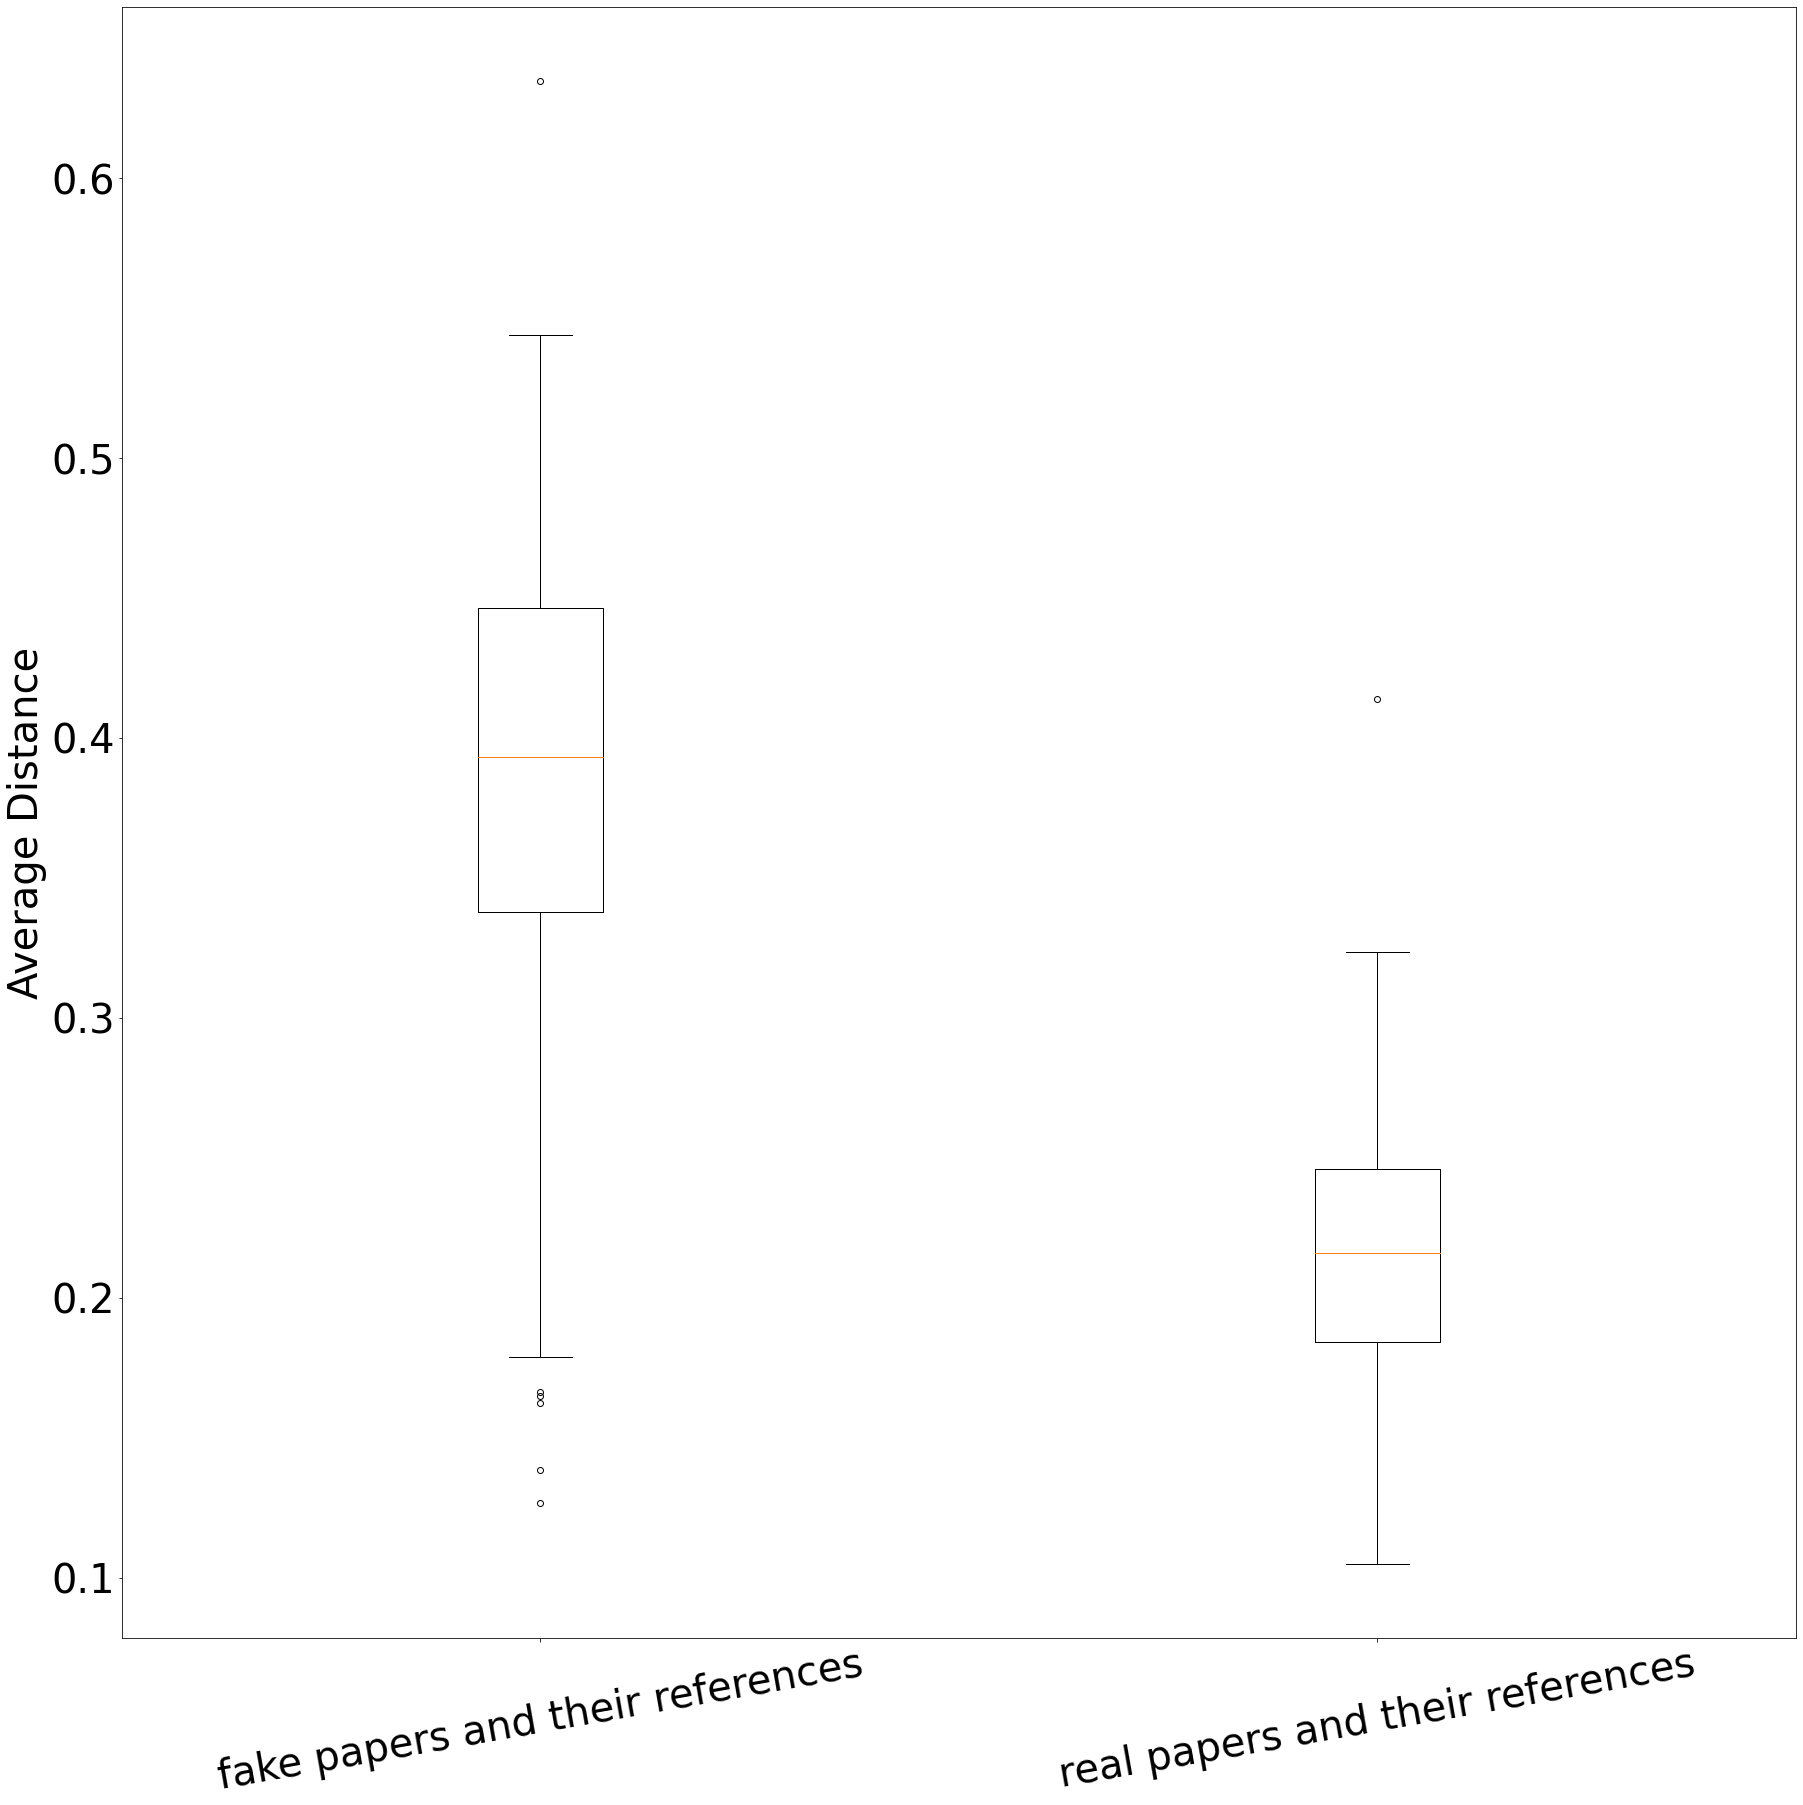

<Figure size 432x288 with 0 Axes>

In [13]:
# boxplot the first 2 lists of distances we have obtained from 3-1 and 3-2.

from matplotlib.pyplot import figure
figure(figsize=(30, 30), dpi=100)
columns = [df1[col1], df2[col2]]
fig, ax = plt.subplots()
ax.boxplot(columns)
# ax.legend([col1, col2], ['A', 'B'], loc='upper right')
plt.xticks([1, 2], [col1, col2], rotation=10, fontsize=40)
plt.yticks(fontsize=40)
plt.ylabel("Average Distance", fontsize=40)
fig = plt.gcf()
fig.set_size_inches(30, 30)
plt.show()
plt.draw()
fig.savefig('/Users/zeyuhu/Documents/job/mdpi/code/scraper/boxplot.jpg')

<Figure size 3000x3000 with 0 Axes>

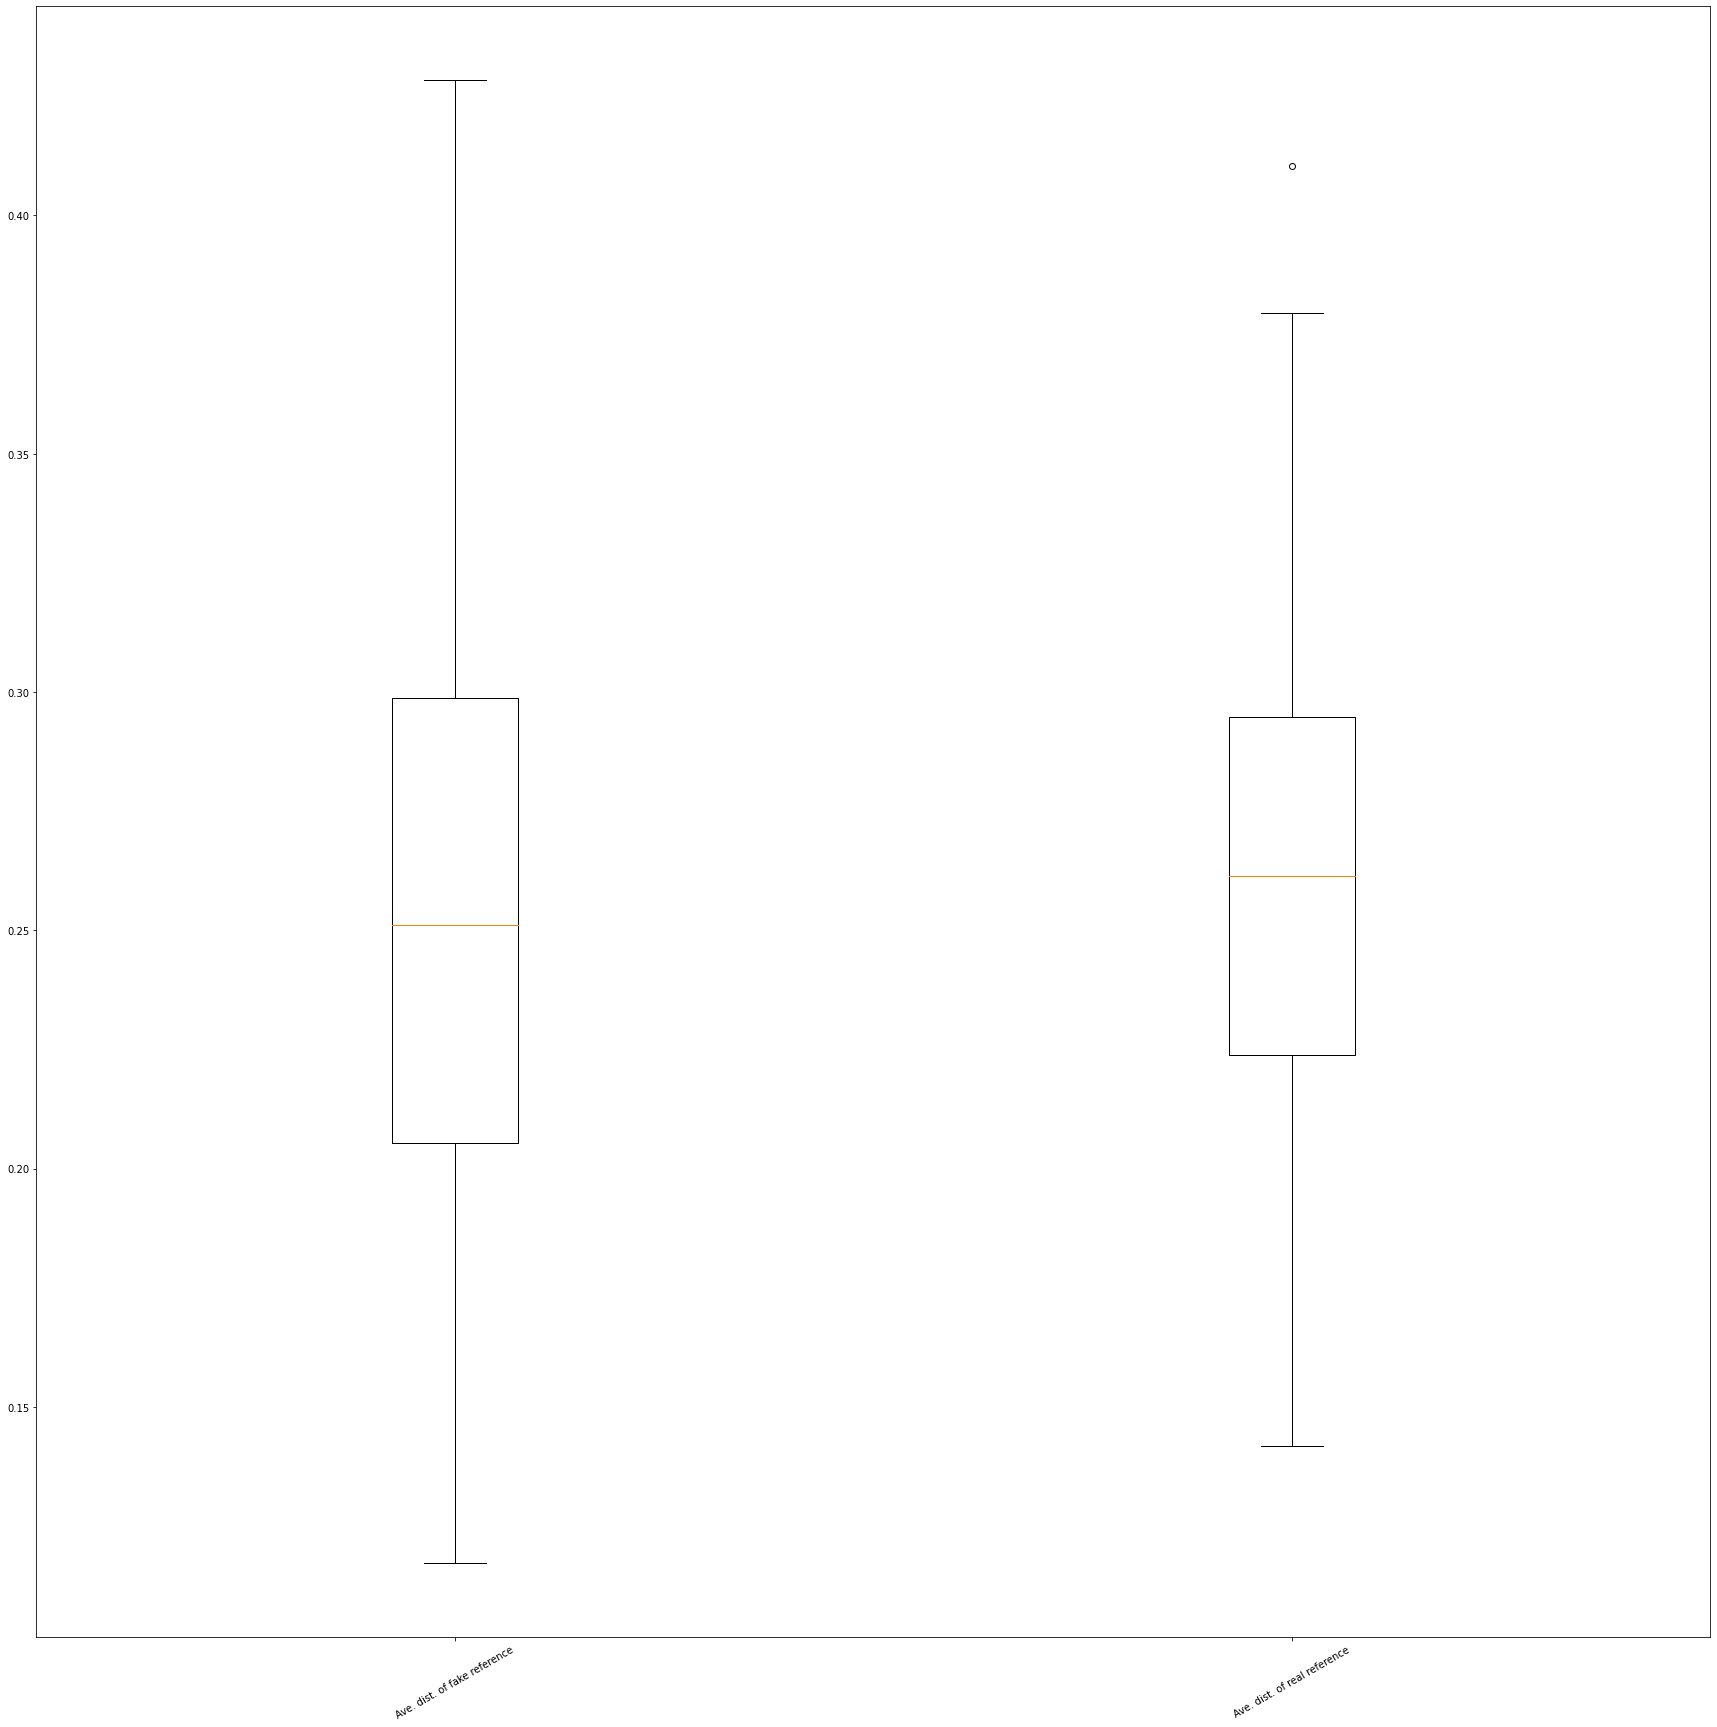

In [14]:
# boxplot the last 2 lists of distances we have obtained from 3-3 and 3-4.

figure(figsize=(30, 30), dpi=100)
columns = [df3[col3], df4[col4]]
fig, ax = plt.subplots()
ax.boxplot(columns)
plt.xticks([1, 2], [col3, col4], rotation=30)
fig = plt.gcf()
fig.set_size_inches(30, 30)
plt.show()

### 4-2. Histograph Plot:

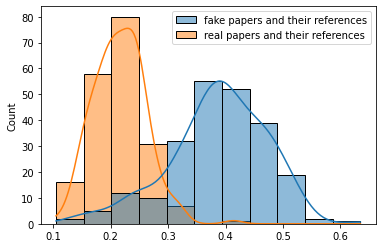

In [15]:
# histo-plot the first 2 lists of distances we have obtained from 3-1 and 3-2.

data = [df1[col1], df2[col2]]
fig, ax = plt.subplots()
fig = plt.gcf()
sns.histplot(data, color=['r', 'b'], kde=True)

plt.draw()
fig.savefig('/Users/zeyuhu/Documents/job/mdpi/code/scraper/histplot.jpg')


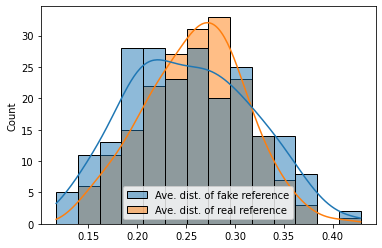

In [16]:
# histo-plot the last 2 lists of distances we have obtained from 3-3 and 3-4.
df3 = pd.DataFrame(same_frfr_dis_list, columns =[col3])
df4 = pd.DataFrame(same_rrrr_dis_list, columns =[col4])

data2 = [df3[col3], df4[col4]]

sns.histplot(data2, color=['r', 'b'], kde=True)
plt.savefig('/Users/zeyuhu/Documents/job/mdpi/code/scraper/books_read.png')

## 5. T-Test for fake paper vs fake reference and real paper vs real reference before bootstrap:

In [17]:
# Use scipy to calculate T-test 

from scipy import stats

t_result = stats.ttest_ind(df1[col1], df2[col2], equal_var = False)
alpha = 0.05

if (t_result[1] < alpha):

    print("The difference between real paper with its reference and fake paper and its reference is significant!")

else:
    print("The difference between real paper with its reference and fake paper and its reference is not significant!")


The difference between real paper with its reference and fake paper and its reference is significant!


## 6. Calculate overlapping area:

In [18]:


data_fake = np.array(same_fpfr_dis_list)
data_real = np.array(same_rprr_dis_list)


# calculate overlapping part
bin_edges = np.histogram_bin_edges(np.concatenate([data_fake, data_real]))
hist1, _ = np.histogram(data_fake, bins=bin_edges)
hist2, _ = np.histogram(data_real, bins=bin_edges)
intersection = np.minimum(hist1, hist2).sum()
print("Intersection = ", intersection)

# calculate total area
total_area = np.maximum(hist1, hist2).sum()
print("Total Area = ", total_area)

# calculate intersection percentage
intersection_percentage = intersection/total_area
print("Intersection Percentage = ", intersection_percentage)

Intersection =  44
Total Area =  378
Intersection Percentage =  0.1164021164021164


## 7. Bootstrap:

### 7-1. Bootstrap, CI :

In [19]:
import numpy as np
rng = np.random.default_rng()
from scipy.stats import norm
from scipy.stats import bootstrap

# randomly resample 1,000,000 data

boot_fake_array = np.random.choice(data_fake,replace = True, size = 1000000) # take a random sample each iteration
boot_real_array = np.random.choice(data_real,replace = True, size = 1000000) # take a random sample each iteration
boot_fake_array.sort()
boot_real_array.sort()

# calculate CI

CI_fake = np.percentile(boot_fake_array, [2.5,97.5])# 95% C.I.
CI_real = np.percentile(boot_real_array, [2.5,97.5])# 95% C.I.

print("fake CI:", CI_fake)
print("real CI:", CI_real)


fake CI: [0.17888691 0.51968216]
real CI: [0.13561611 0.31274009]


### 7-2. Scikit.boot with BCa:

In [20]:
# using scikit to calculate fake CI with BCa 
import scikits.bootstrap as boot

def stat0(x0):
    return np.random.choice(x0,replace = True)
print("Fake BCa CI:")
boot.ci(data_fake, stat0, alpha=0.05, n_samples=1000000, method='bca')

Fake BCa CI:


/var/folders/15/r1hzc05x0rs93jwdtmt1yr4m0000gn/T/ipykernel_44853/2401565066.py:7: InstabilityWarning: Some values used top 10 low/high samples; results may be unstable.
  boot.ci(data_fake, stat0, alpha=0.05, n_samples=1000000, method='bca')


array([0.12652407, 0.32577403])

In [21]:
# using scikit to calculate real CI with BCa 
print("Real BCa CI:")
boot.ci(data_real, stat0, alpha=0.05, n_samples=1000000, method='bca')

Real BCa CI:


array([0.10496875, 0.23713204])

### 7-3. Plot after Bootstrap:

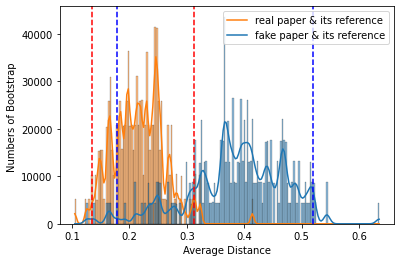

In [22]:
data_f_r_np = [boot_fake_array, boot_real_array] 
fig, ax = plt.subplots()

ax = sns.histplot(data_f_r_np, color=['r', 'b'], kde=True)
ax.legend(['real paper & its reference', 'fake paper & its reference'])
# sns.distplot(boot_fake_array, color = 'b', kde=True)
# sns.distplot(boot_real_array, color = 'r', kde=True)
plt.axvline(CI_fake[0], color='b', linestyle='--', label='0.9')
plt.axvline(CI_fake[1], color='b', linestyle='--', label='0.9')

plt.axvline(CI_real[0], color='r', linestyle='--', label='0.9')
plt.axvline(CI_real[1], color='r', linestyle='--', label='0.9')


plt.xlabel("Average Distance")
plt.ylabel("Numbers of Bootstrap ")

fig = plt.gcf()
plt.draw()
fig.savefig('/Users/zeyuhu/Documents/job/mdpi/code/scraper/histplot2.jpg')

### 7-4. Overlapping Calculation after Bootstrap:

In [23]:
# calculate overlapping area which is similar as previous one
bin_edges = np.histogram_bin_edges(np.concatenate([boot_fake_array, boot_real_array]))
hist1, _ = np.histogram(boot_fake_array, bins=bin_edges)
hist2, _ = np.histogram(boot_real_array, bins=bin_edges)
intersection = np.minimum(hist1, hist2).sum()
print("Intersection Area = ", intersection)

total_area = np.maximum(hist1, hist2).sum()
print("Total Area = ", total_area)

intersection_percentage = intersection/total_area
print("Overlapping Area Percentage = ", intersection_percentage)

Intersection Area =  194387
Total Area =  1805613
Overlapping Area Percentage =  0.10765706715669415


### 7-5. T-Test after Bootstrap using Scipy Package:

In [24]:
from scipy import stats

t_result = stats.ttest_ind(boot_fake_array, boot_real_array)
alpha = 0.05

if (t_result[1] < alpha):

    print("The difference between real paper with its reference and fake paper and its reference is significant!")

else:
    print("The difference between real paper with its reference and fake paper and its reference is not significant!")



The difference between real paper with its reference and fake paper and its reference is significant!


In [25]:
# T-statistics
t_result[0]

1781.9830768124714

In [26]:
# p-value:
t_result[1]

0.0